In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode
from scipy.optimize import fsolve
import plotly.figure_factory as ff
import pandas as pd
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D

/home/pedrov/.local/lib/python3.11/site-packages/geopandas/_compat.py:153: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  set_use_pygeos()


In [2]:
def create_dataset(x,y):
    df= pd.DataFrame({'x':[x],'y':[y]})
    return df

def save_dataset(df):
    df.to_csv('./dataset.csv',index=False)


def generateRandomDataset(lim,range):
    x, y = np.meshgrid(np.linspace(-lim, lim, range), np.linspace(-lim, lim, range))
    return x,y

## Gradiente, Divergente e Rotacional

campo escalar

Campo vetorial

,x,y
0,"[[0.0, 0.2, 0.4, 0.6000000000000001, 0.8, 1.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


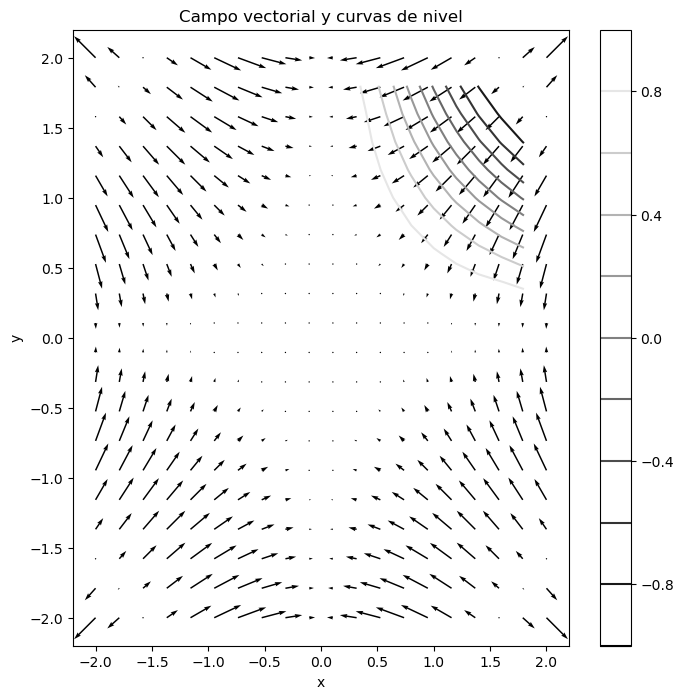

In [3]:
x, y = np.meshgrid(np.arange(0, 2, 0.2), np.arange(0, 2, 0.2))
lim = 2


z = np.cos(x*y)

x_, y_ = np.meshgrid(np.linspace(-lim, lim, 20), np.linspace(-lim, lim, 20))

vx = -np.sin(y_*x_)*y_
vy = -np.sin(y_*x_)*x_

df = create_dataset(x,y)
display(df)

plt.figure(figsize=(8,8))
plt.gray()
plt.quiver(x_, y_, vx, vy) #campo
plt.contour(x, y, z, levels=10,) #curvas de nivel
plt.xlabel('x')
plt.ylabel('y')
plt.title('Campo vectorial y curvas de nivel')
plt.colorbar()
plt.show()

Divergente

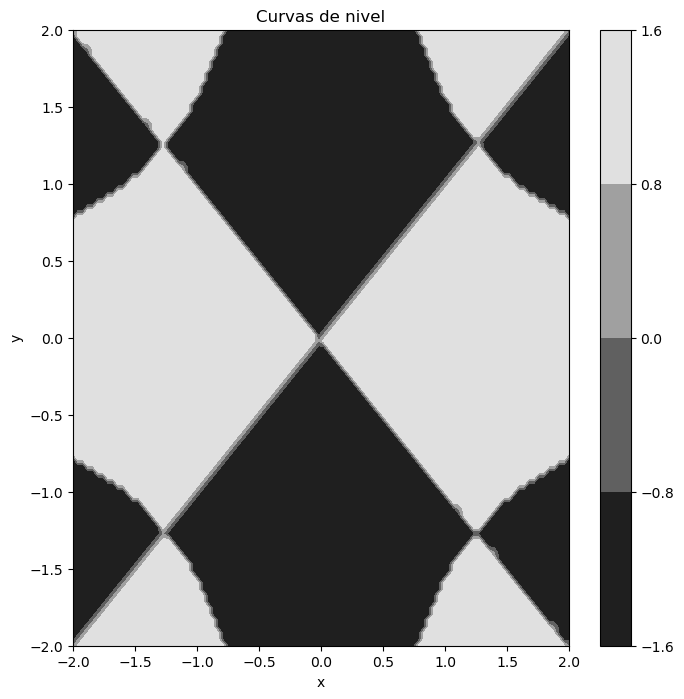

In [4]:
x,y = generateRandomDataset(2,100)

z = np.cos(x*y)*x**2 - np.cos(x*y)*y**2
z[z>0] = 1 #branco
z[z<0] = -1 #preto


# Create a figure and axis object
fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.show()

plt.figure(figsize=(8,8))
plt.contourf(x, y, z, levels=2, cmap=plt.get_cmap("gray"))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Curvas de nivel')
plt.colorbar()
plt.show()

Rotacional

Gradiente

## Calculo Vetorial

https://www.youtube.com/playlist?list=PLg0ijj_Zz1a4r6JNAIcKI3io8PKdmdMYD

In [5]:
# from Calculadora import Calculadora


class EletroMagnetismo:
    def __init__(self):
        pass


    

    def campoGravitacional(self,x0,y0,x,y,k= 1):
        vx = x0 - x
        vy = y0 - y

        d = np.sqrt(vx**2 + vy**2)

        v = np.array([vx,vy])

        vu = v/d

        f = k*vu/d**2

        return f[0], f[1]

    def plot_vetor(self, x, y, vx, vy,_tamanho,_label):
        fig = ff.create_quiver(
            x,
            y,
            vx,
            vy,
            scale=0.1,
            arrow_scale=_tamanho,
            name=_label,
            line_width=2,
            marker=dict(color="red"),
        )
        fig.add_trace(go.Scatter(x=[0], y=[0], mode="markers", marker=dict(color="black"),marker_size = 12, name=" Origem"))
        fig.show()

    def plot_campoMagnetico(self,values =[0,0]):
        x, y = np.meshgrid(np.linspace(-1.5,1.5,15),np.linspace(-1.5,1.5,15))

        vx, vy = self.campoGravitacional(values[0], values[1], x, y)
        # fig, ax = plt.subplots
        plt.figure(figsize=(10,10))
        # plt.streamplot(x,y,vx,vy)
        plt.quiver(x,y,vx,vy)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()

    def plot_campoVetorial(self):
        x, y = np.meshgrid(np.linspace(-1.5,1.5,15),np.linspace(-1.5,1.5,15))

        vx, vy = self.campoGravitacional(0,0,x,y)
        # fig, ax = plt.subplots
        plt.figure(figsize=(10,10))
        plt.streamplot(x,y,vx,vy)

/tmp/ipykernel_785540/994679840.py:19: RuntimeWarning:

invalid value encountered in divide



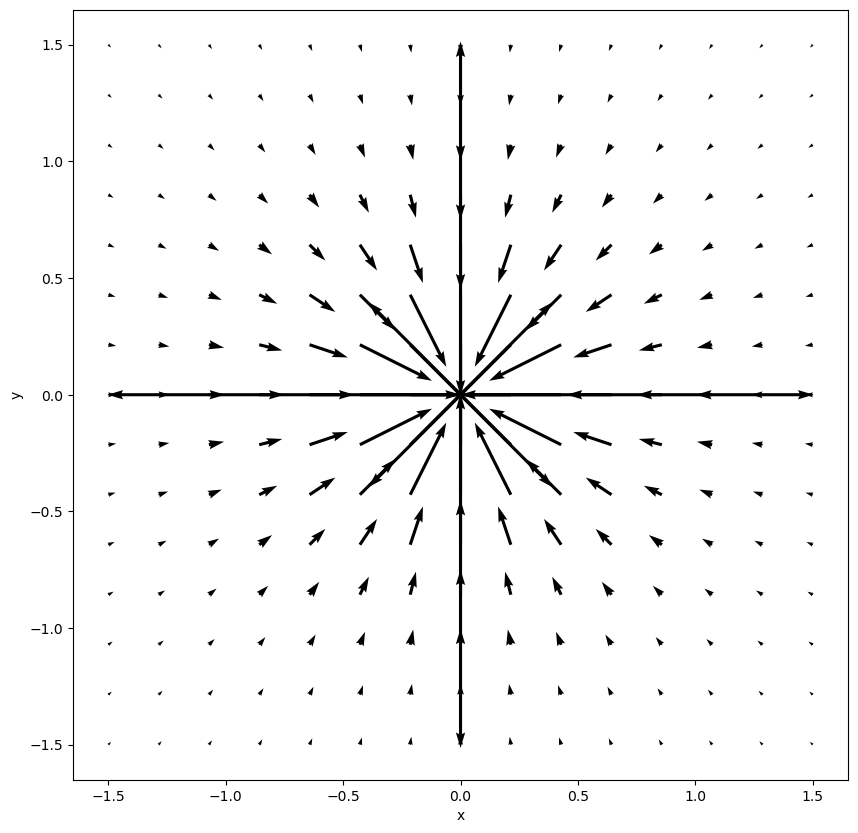

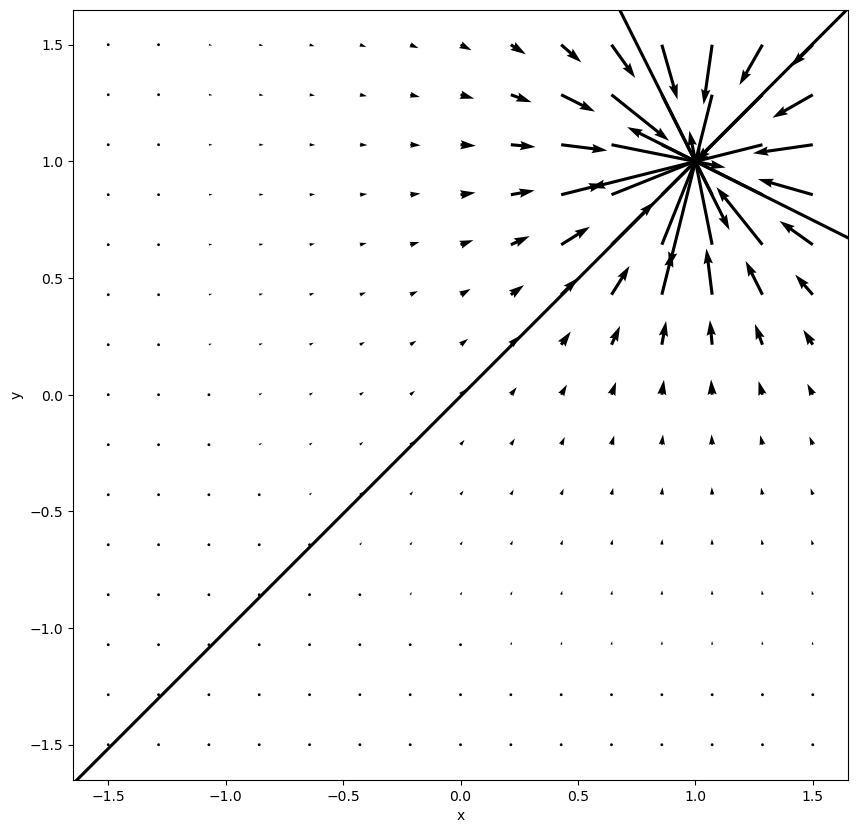

Campo Magnético: (-0.3535533905932737, -0.3535533905932737)


In [6]:
# calc = Calculadora()

eletromag = EletroMagnetismo()
eletromag.plot_campoMagnetico([0,0])
eletromag.plot_campoMagnetico([1, 1])

print(f"Campo Magnético: {eletromag.campoGravitacional(0,0,1,1)}")

In [7]:
#vetores

x,y = np.meshgrid(np.arange(0,2,0.2),np.arange(0,2,0.2))

u = np.sin(x)
v = np.sin(y)

eletromag.plot_vetor(x,y,u,v,0.5,"Campo Magnético")

## Calculo 2

## Calculo 3

## Coordenadas Cartesianas, Cilindricas e esfericas

Esfera

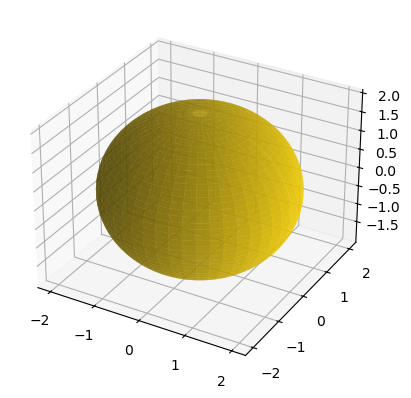

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

theta = np.arange(0, 2 * np.pi, 0.01)
phi = np.arange(0, np.pi, 0.01)

theta, phi = np.meshgrid(theta, phi)

raio = np.sqrt(4)

x = raio * np.sin(phi) * np.cos(theta)
y = raio * np.sin(phi) * np.sin(theta)
z = raio * np.cos(phi)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.plot_surface(x, y, z, color="gold", alpha=0.7)

plt.show()

In [31]:
import numpy as np
import plotly.graph_objects as go

# Define as coordenadas das cargas
coordenadas_cargas = [(1, 0, 0), (0, 1, 0), (0, 0, 1)]

# Cria uma figura tridimensional
fig = go.Figure(
    data=[
        go.Scatter3d(
            x=[c[0] for c in coordenadas_cargas],
            y=[c[1] for c in coordenadas_cargas],
            z=[c[2] for c in coordenadas_cargas],
            mode="markers",
            marker=dict(size=10, color="blue", opacity=0.8),  # Define a cor das cargas
        )
    ]
)

# Adiciona a superfície da esfera
phi = np.linspace(0, np.pi, 50)
theta = np.linspace(0, 2 * np.pi, 100)
phi, theta = np.meshgrid(phi, theta)

# Converte coordenadas esféricas para coordenadas cartesianas
x = np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(phi)

# Adiciona a superfície da esfera ao gráfico
fig.add_trace(go.Surface(x=x, y=y, z=z))

# Atualiza o layout do gráfico
fig.update_layout(
    scene=dict(
        xaxis=dict(title="X"),
        yaxis=dict(title="Y"),
        zaxis=dict(title="Z"),
    ),
    margin=dict(l=0, r=0, b=0, t=0),
)

# Exibe o gráfico
fig.show()

Cilindro

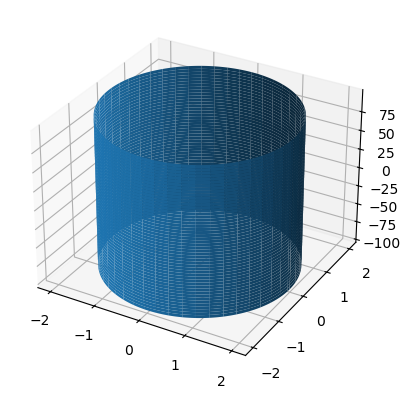

In [16]:
theta = np.arange(0, 2*np.pi, 0.01)
z_ = np.arange(-100,100,0.01)


r = np.sqrt(4)

theta, z_ = np.meshgrid(theta, z_)

x = r * np.cos(theta)
y = r * np.sin(theta)
z= z_

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.plot_surface(x, y, z, )
plt.show()